Name - Aryan Prashant Parab

Task 3 - Prediction using Decision Tree Algorithm.

Objective - Predicting the Iris dataset using a Decision Tree Algorithm.

# Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # to draw graphs
from sklearn.tree import DecisionTreeClassifier  # to build a classification tree
from sklearn.tree import plot_tree   # to draw a classification tree
from sklearn.model_selection import train_test_split  # to split data into training and testing sets.
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix.

# Dataset.

In [3]:
df=pd.read_csv('Iris (1).csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Shape.

In [5]:
print("No.of_rows:{}".format(df.shape[0]))
print("No.of_columns:{}".format(df.shape[1]))

No.of_rows:150
No.of_columns:6


# Missing Values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


 # Describe.

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# how is data segregated into several categories.
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
# Make a copy of the original dataset.
dfc=df.copy()

In [10]:
df=df.drop("Id",axis=1)

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
# one hot encoding for the species column.
df2=pd.get_dummies(df,columns=['Species'])

In [13]:
df2.shape

(150, 7)

In [14]:
x=df2.iloc[:,:-3].values
y=df2.iloc[:,4:].values

In [15]:
#Splitting the dataset into the training set and testing set.

train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=96)

In [16]:
print(train_x.shape)
print(train_x)

(112, 4)
[[5.2 3.5 1.5 0.2]
 [6.2 3.4 5.4 2.3]
 [5.1 3.5 1.4 0.3]
 [6.9 3.1 4.9 1.5]
 [5.4 3.9 1.3 0.4]
 [5.  2.3 3.3 1. ]
 [6.8 3.  5.5 2.1]
 [6.  3.  4.8 1.8]
 [6.  2.9 4.5 1.5]
 [7.7 3.  6.1 2.3]
 [5.  3.5 1.3 0.3]
 [5.6 2.7 4.2 1.3]
 [4.6 3.6 1.  0.2]
 [6.3 2.5 4.9 1.5]
 [4.9 3.1 1.5 0.1]
 [4.4 3.2 1.3 0.2]
 [7.7 2.8 6.7 2. ]
 [6.1 2.9 4.7 1.4]
 [6.9 3.1 5.4 2.1]
 [6.  2.7 5.1 1.6]
 [6.9 3.1 5.1 2.3]
 [5.7 2.5 5.  2. ]
 [5.8 2.7 3.9 1.2]
 [5.1 3.5 1.4 0.2]
 [4.8 3.  1.4 0.1]
 [6.4 3.2 4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 5.1 1.9]
 [4.9 3.  1.4 0.2]
 [5.6 3.  4.1 1.3]
 [5.  2.  3.5 1. ]
 [5.1 3.8 1.5 0.3]
 [4.8 3.4 1.6 0.2]
 [6.  2.2 5.  1.5]
 [4.9 2.5 4.5 1.7]
 [5.  3.6 1.4 0.2]
 [7.7 2.6 6.9 2.3]
 [5.7 2.8 4.5 1.3]
 [6.7 3.  5.  1.7]
 [5.7 2.8 4.1 1.3]
 [5.1 3.8 1.9 0.4]
 [6.5 3.  5.8 2.2]
 [6.7 3.  5.2 2.3]
 [5.1 3.4 1.5 0.2]
 [6.3 2.3 4.4 1.3]
 [6.2 2.8 4.8 1.8]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.3]
 [4.9 3.1 1.5 0.1]
 [5.  3.  1.6 0.2]
 [6.6 3.  4.4 1.4]
 [4.7 3.2 1.6 0.2]
 [5

In [17]:
print(train_y.shape)
print(train_y)

(112, 3)
[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 

In [18]:
print(test_x.shape)
print(test_x)

(38, 4)
[[4.8 3.1 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [5.5 2.6 4.4 1.2]
 [6.4 3.2 5.3 2.3]
 [5.  3.3 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.9 3.2 4.8 1.8]
 [5.5 3.5 1.3 0.2]
 [6.7 3.1 4.7 1.5]
 [5.2 2.7 3.9 1.4]
 [5.3 3.7 1.5 0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.3 5.7 2.5]
 [5.5 2.3 4.  1.3]
 [5.4 3.4 1.5 0.4]
 [4.7 3.2 1.3 0.2]
 [7.1 3.  5.9 2.1]
 [5.2 3.4 1.4 0.2]
 [5.  3.4 1.6 0.4]
 [6.1 2.8 4.  1.3]
 [7.7 3.8 6.7 2.2]
 [5.8 2.7 5.1 1.9]
 [6.1 3.  4.6 1.4]
 [5.5 2.4 3.8 1.1]
 [4.5 2.3 1.3 0.3]
 [6.7 3.1 5.6 2.4]
 [6.4 2.8 5.6 2.1]
 [5.1 2.5 3.  1.1]
 [4.6 3.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.9 4.3 1.3]
 [5.8 2.6 4.  1.2]
 [5.6 2.9 3.6 1.3]
 [4.3 3.  1.1 0.1]
 [6.4 2.8 5.6 2.2]]


In [19]:
print(test_y.shape)
print(test_y)

(38, 3)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]]


# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

# Training the Decision tree classification model on Training set.

In [21]:
classifier=DecisionTreeClassifier(random_state=96)
classifier.fit(train_x,train_y)

DecisionTreeClassifier(random_state=96)

[Text(372.0, 747.4499999999999, 'X[3] <= -0.671\ngini = 0.443\nsamples = 112\nvalue = [[79, 33]\n[74, 38]\n[71, 41]]'),
 Text(279.0, 611.55, 'gini = 0.0\nsamples = 33\nvalue = [[0, 33]\n[33, 0]\n[33, 0]]'),
 Text(465.0, 611.55, 'X[3] <= 0.673\ngini = 0.333\nsamples = 79\nvalue = [[79, 0]\n[41, 38]\n[38, 41]]'),
 Text(372.0, 475.65, 'X[2] <= 0.606\ngini = 0.137\nsamples = 43\nvalue = [[43, 0]\n[5, 38]\n[38, 5]]'),
 Text(186.0, 339.74999999999994, 'X[3] <= 0.539\ngini = 0.035\nsamples = 37\nvalue = [[37, 0]\n[1, 36]\n[36, 1]]'),
 Text(93.0, 203.8499999999999, 'gini = 0.0\nsamples = 36\nvalue = [[36, 0]\n[0, 36]\n[36, 0]]'),
 Text(279.0, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(558.0, 339.74999999999994, 'X[3] <= 0.405\ngini = 0.296\nsamples = 6\nvalue = [[6, 0]\n[4, 2]\n[2, 4]]'),
 Text(465.0, 203.8499999999999, 'gini = 0.0\nsamples = 3\nvalue = [[3, 0]\n[3, 0]\n[0, 3]]'),
 Text(651.0, 203.8499999999999, 'X[2] <= 0.898\ngini = 0.296\nsamples 

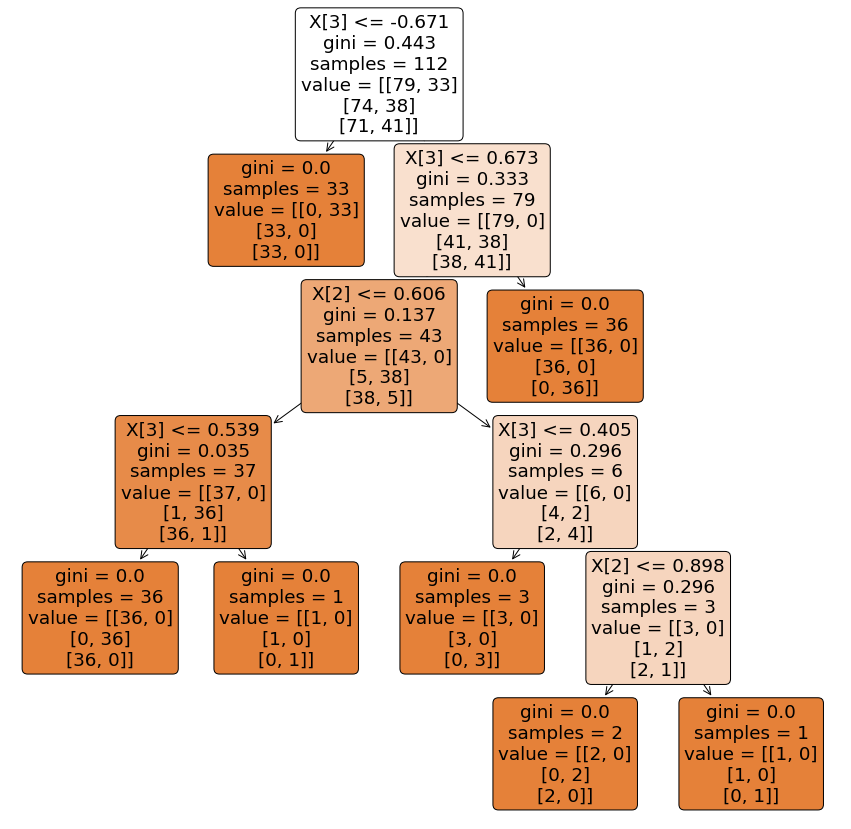

In [22]:
plt.figure(figsize=[15,15])
plot_tree(classifier,
         filled=True,
         rounded=True)

# Predicting the Test set results.

In [23]:
y_pred=classifier.predict(test_x)

In [24]:
y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

# Predicting a New Result.

In [25]:
print(classifier.predict(sc.transform([[5.0,3.3,1.4,0.2]])))

[[1 0 0]]
